# Questions

## Fuzzy sets

1. What is the difference between a characteristic function and a membership function?

A characteristic function is associated with classical set theory, which determines in a binary way wether or not an element belongs to a set. The membership function is a concept in fuzzy logic which dictates the degree of membership of said element in a fuzzy set. While the characteristic function has values of 0 or 1, the membership function can take any value between 0 and 1. The higher the value, the higher is the degree of membership to the fuzzy set. This allows fuzzy logic to model uncertainty, unlike classical set theory.

Consider the two fuzzy sets in the Universe of Discourse X ={−8, −6, −4, −2, 0, 2, 4, 6, 8}:


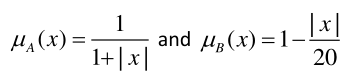

In [7]:
from IPython.display import Image

# Provide the file path or URL of the image
image_path = 'C:/Users/AndreLopes/Desktop/git/Intelligent_Systems/img.png'

# Display the image
Image(filename=image_path)


a) Are the membership functions valid in the given Universe?

b) Compute the α-cuts of A and B for α = 0.3

1. Develop a type zero or type one Takagi-Sugeno fuzzy model to classify the data. It is up
to you to select the relevant quantities for various model parameters. However, you are
required to estimate the optimal consequent parameters by using least-mean squares
estimation. The input/output space partition should be obtained using either a grid, or
fuzzy clustering (FCM or GK). You can use the Python libraries PyFUME or Scikit-Fuzzy. If
you choose to use Matlab please use Mathworks Fuzzy Toolbox to derive the model.
Save your optimal model along with any other relevant information (in Matlab it will be
the file model.mat), or your Jupyter notebook and all the results from Python.

- No need for missing values imputation.
- Scaling should'nt be necessary as it will probably leave out explainable details from the fuzzy model

In [5]:
import pandas as pd

attributes = ['target_class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue','OD280/OD315 of diluted wines', 'Proline']
df = pd.read_csv('wine.data', names=attributes)
#print(df.head())

missing_values = df.isna().sum()
print(missing_values)

target_class                    0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64


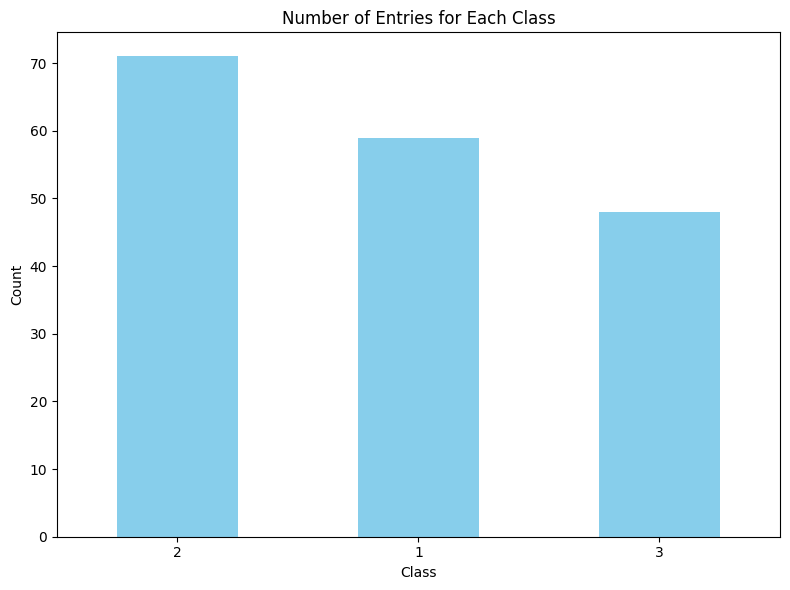

In [11]:
import matplotlib.pyplot as plt

class_counts = df['target_class'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
ax = class_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Entries for Each Class')

# Correct the orientation of x-axis labels to be horizontal (0 degrees)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Display the plot
plt.tight_layout()  # Optional: Ensures labels are not cut off
plt.show()



2. Write a brief report G**_A1_report (where “**” should be replaced by your group
number) in which you explain how you determined the classification model. This report
should include also the main obtained results, which must be discussed. The report can
be obtained directly from your notebook as long as it includes all the referred
information (you can use Markdown for the text of the report). A pdf file generated by
LATEX or word is also acceptable.

3. Write a script (in Matlab is model.m in Python is for example model.py) that reads
your data (as e.g. model.mat) and classify the test set. Your script should save the
vector of classification values y to a file.

4. Your deliverables should be available in the group GitHub and the report
G**_A1_report.pdf) is delivered in Fenix system and has to include the link for
GitHub .